<h1> Notebook details </h1>

<h1> **Analysis of COVID-19 Cases and Trends in Multiple Provinces of China** </h1>

1. The dataset mentioned underneath is uploaded from the kaggle COVID-19 Dataset. (https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset).
2. Apart Python Notebooks, visualizations are also imported from Tableau, PowerBI and analysis is also done on Excel and SAS.
3. The details for the same is added to this python notebook wherever applicable.

Special Thanks to Sudalairajkumar for making the dataset available and opening the kaggle task for the month on COVID-19.


<h1> Importing the essential Libraries </h1>

In [20]:
import pandas as pd  
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

<h2> Reading the covid-19 dataset </h2>

<h3> * The following dataset is obtained from Kaggle and data is updated as of March 16, 2020 at 10:00 (IST) </h3>

In [21]:
data = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')
data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14T16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15T18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14T02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10T02:33:04,0.0,0.0,0.0
5889,5890,03/15/2020,NaN,occupied Palestinian territory,2020-03-11T20:53:02,0.0,0.0,0.0


<h1> Peforming basic data wrangling </h1>

In [22]:
#Dropping of the last updated column
data.drop('Last Update',axis=1, inplace=True)

#Reseting the index
data.set_index('SNo',inplace = True)

#Viewing the dataset post ETL
data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
SNo,,,,,,
1,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


<h1> Understanding the spread in China </h1>

In [23]:
#Selecting only those data rows where country = China

China_Data = data['Country/Region'] == 'Mainland China'   #Selecting the country China
covid_china_data = data[China_Data]                       #Filtering the dataset
covid_china_data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
SNo,,,,,,
1,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


<h1> Editing the generated dataset above </h1>

The following edits are made on the dataset above. (The editing was done on MS-Excel 2019 and data was loaded back to notebook)

1. The Observation Date columns datatype was changed from string to Excel's Date Format.
2. Some duplicates rows (Multiple recordings for same day was removed). (A total of 6)

The dataset was then loaded back to the dataset

In [24]:
china_data = pd.read_csv('../input/china-covid19-data/China_edited_data.csv')
china_data.head()

,Province/State,Country/Region,Confirmed,Deaths,Recovered,Latitude,Longitude,Observation Date
0,Anhui,Mainland China,1,0,0,32.0,117.0,22-01-2020
1,Anhui,Mainland China,9,0,0,32.0,117.0,23-01-2020
2,Anhui,Mainland China,15,0,0,32.0,117.0,24-01-2020
3,Anhui,Mainland China,39,0,0,32.0,117.0,25-01-2020
4,Anhui,Mainland China,60,0,0,32.0,117.0,26-01-2020


<h1> Plotting Line Graph on Confirmed Cases over time for a Input City (China) </h1>

Enter the city to be searched
Hubei


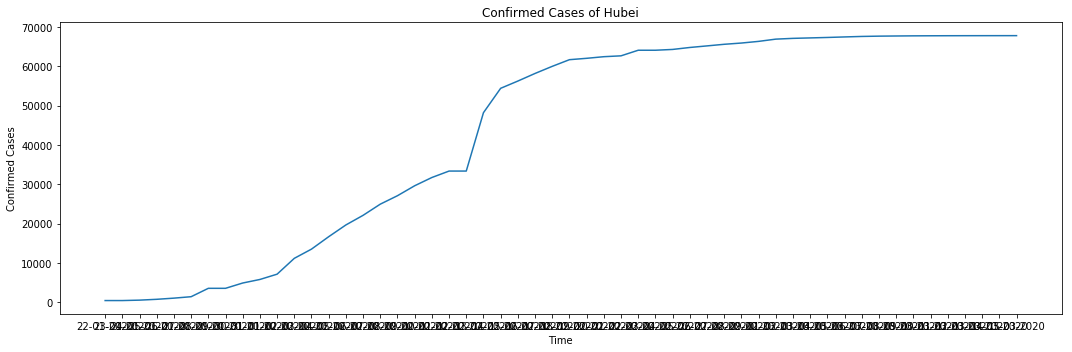

In [26]:
search_city = str(input("Enter the city to be searched\n"))

#Draws the plot for the searched city in China

search_data = china_data['Province/State'] == search_city       #Selecting the country China
search_data = china_data[search_data]                           #Filtering the dataset

x = search_data['Observation Date']
y = search_data['Confirmed']

plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.title('Confirmed Cases of {}'.format(search_city))
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')

plt.tight_layout()
plt.show()

<h1> Importing Graphs of Confimed Cases over time for 31 cities in China </h1>

1. Similar Graphs were generated for all the cities in China in MS-EXCEL 19.
2. All the graphs were edited into final figures which are uploaded underneath

Populating the interactive namespace from numpy and matplotlib


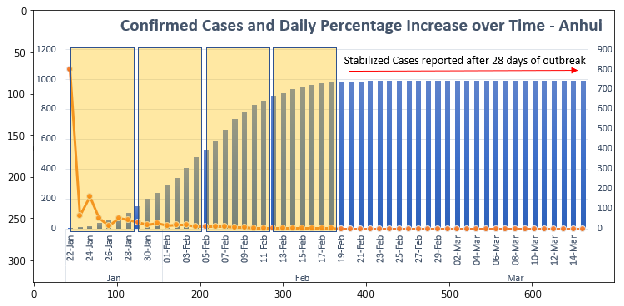

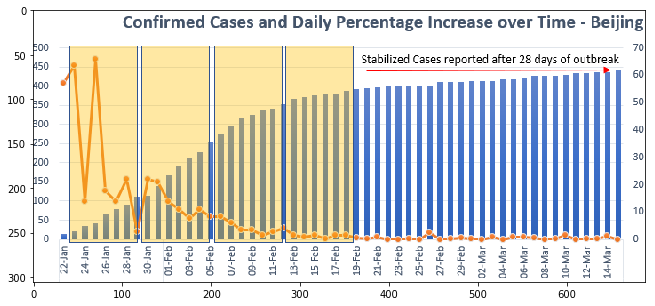

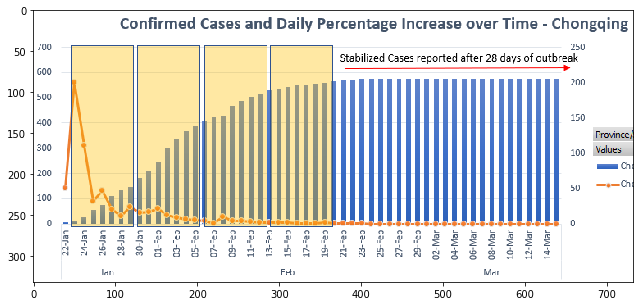

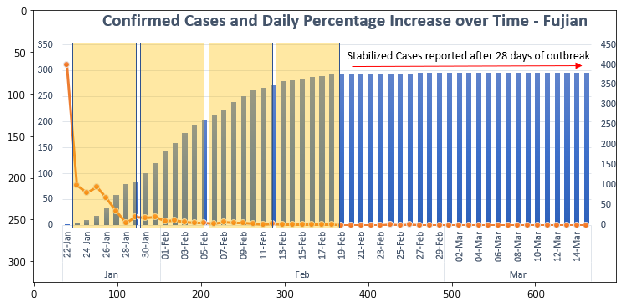

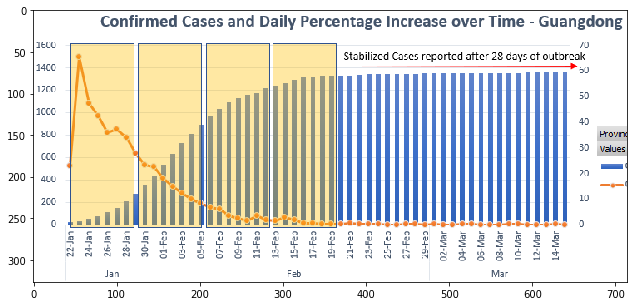

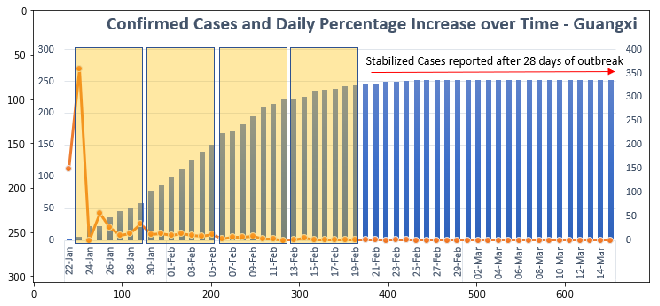

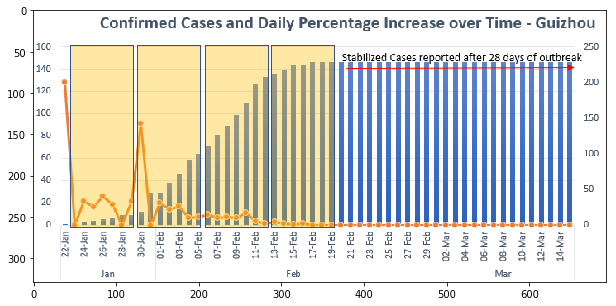

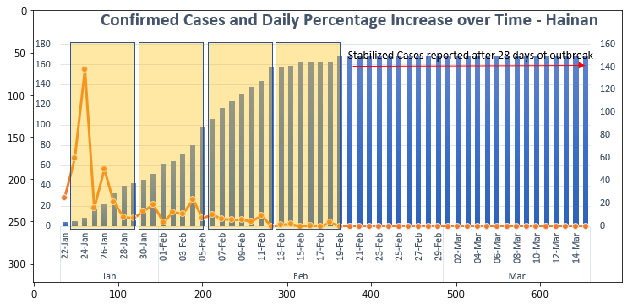

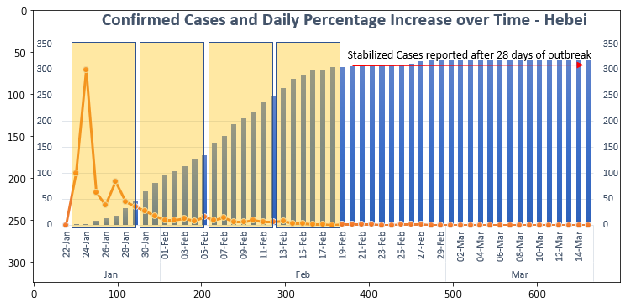

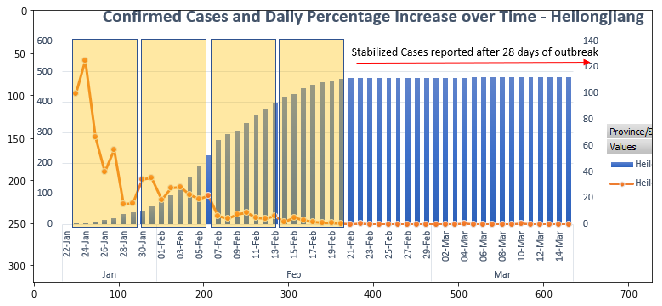

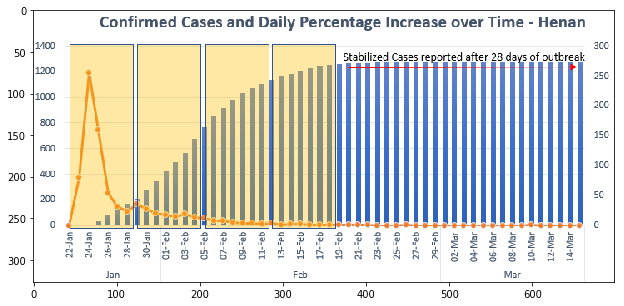

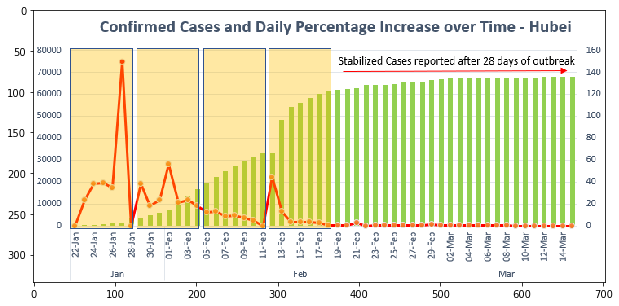

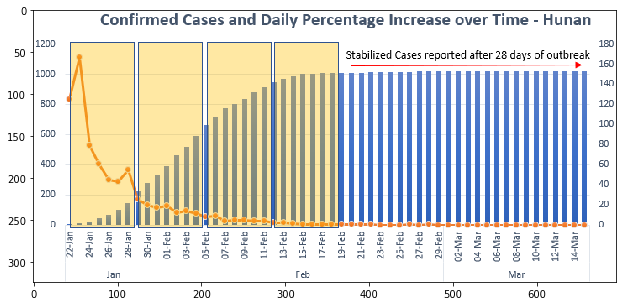

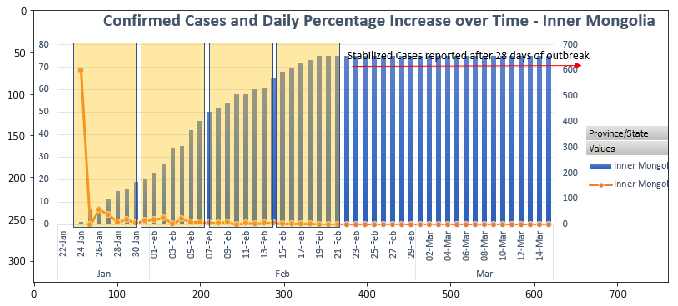

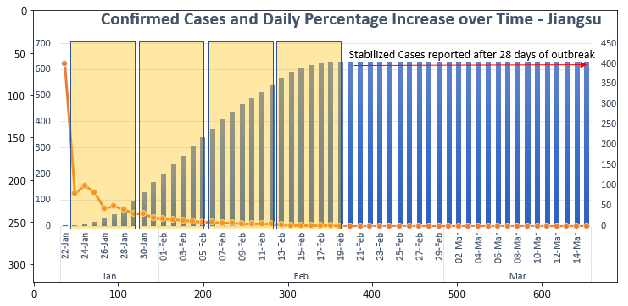

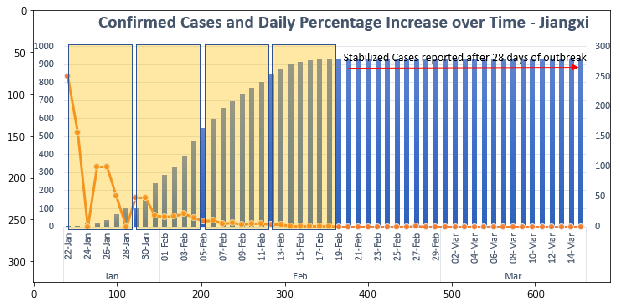

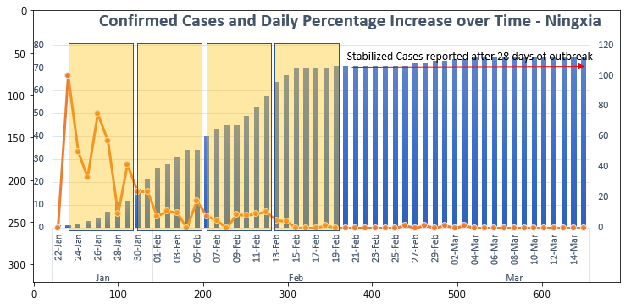

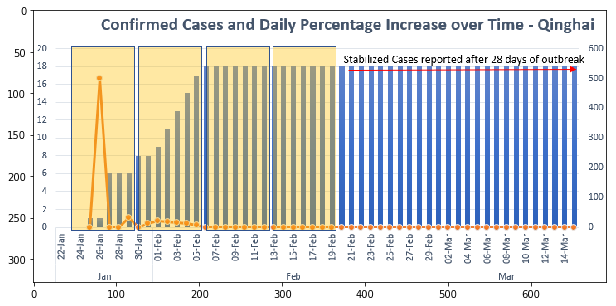

In [27]:
#Viewing the generated grpahs for the reported cities in China

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,5))
img=mpimg.imread('../input/china-covid19-data/Anhui.png')
imgplot = plt.imshow(img)
plt.show()

plt.figure(figsize=(15,5))
img=mpimg.imread('../input/china-covid19-data/Beijing.png')
imgplot = plt.imshow(img)
plt.show()

for i in range(1,17):
    plt.figure(figsize=(15,5))
    img=mpimg.imread('../input/china-covid19-data/Screenshot ({}).png'.format(303+i))
    imgplot = plt.imshow(img)
    plt.show()

<h1> Understanding the Graph Generated </h1>

With example of Hubei Province in China

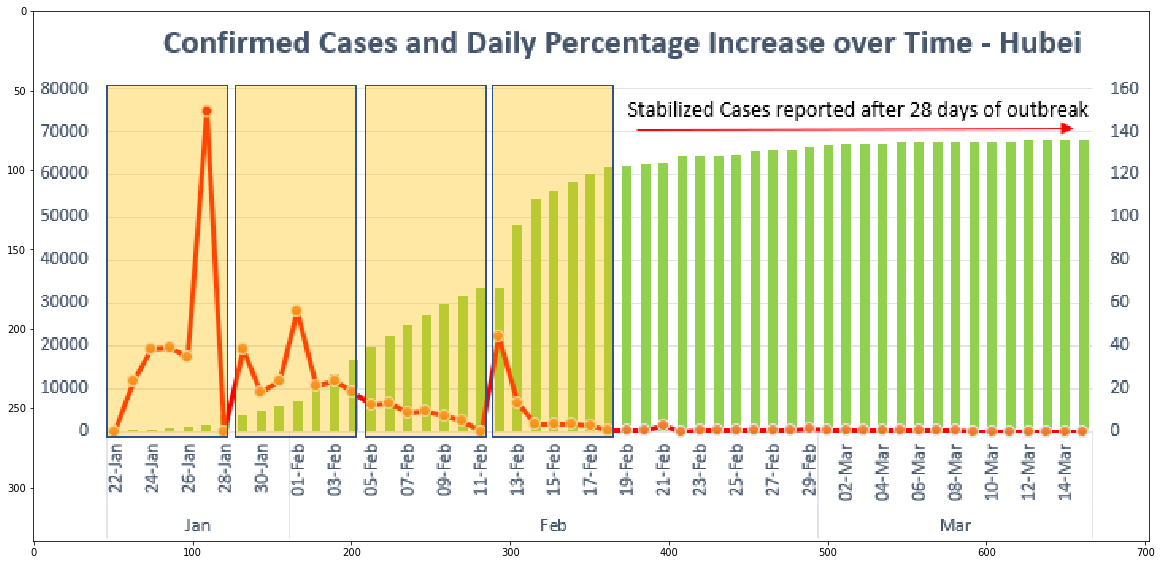

In [28]:
#Plotting the Graph for Hubei, China (Largest Number of reported cases)

plt.figure(figsize=(20,10))
img=mpimg.imread('../input/china-covid19-data/Screenshot (313).png')
imgplot = plt.imshow(img)
plt.show()

<h1> Graph Understanding </h1>

1. The X axis for all the above graphs denoted the dates on which the cases were reported
2. The (LHS) Y axis denoted the number of confirmed cases.
3. The (RHS) Y axis denoted the % daily growth rate of newer confirmed COVID-19 Cases.

The stacked bars, mentioned in chart above shows the confirmed cases of COVID-19 and it's progression with time. The red line chart shows the growth rate of newer cases reported daily.

The newer cases have been calculated here by the formula :

Growth Rate = ((Newer Cases / Older cases) - 1) * 100


<h1> Trends observed in dataset </h1>

The four rectangular boxes in the graph above highlights the 4 Weeks of Progression of COVID-19 Cases. The following trends are observed in this data.

1. The growth rate of newer cases is higher in Week 2 - Week 3 and Highest newer cases are seen in Week 3.
2. After week 4 of the virus onset, the cases stabilize with very very newer cases reported. The growth rate for newer cases under such period is <0.1%

These trends are observed all through out China, in the entire mentioned provinces for which the data has been recorded. Graphs for the same have been attached in the cell above.

<h1> Possible Conclusions on China Dataset </h1>

In the later notebook I would analyze that if the same trend is observed for more countries. From that we could draw a conclusion that the virus infection nullifies after a certain tenure after a specific time.  

More details on the same would be checked in the further notebooks.


<h1> Essentials </h1>

Feel free to link this notebook and find more relevant patterns as COVID-19 is a concern for all of us.